In [1]:
import tensorflow as tf
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile
from tensorflow import keras

(train_input, train_target), (val_input, val_target) = keras.datasets.mnist.load_data()

2025-06-18 09:43:20.087024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750207400.107138   24685 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750207400.113737   24685 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750207400.129266   24685 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750207400.129289   24685 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750207400.129291   24685 computation_placer.cc:177] computation placer alr

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


0


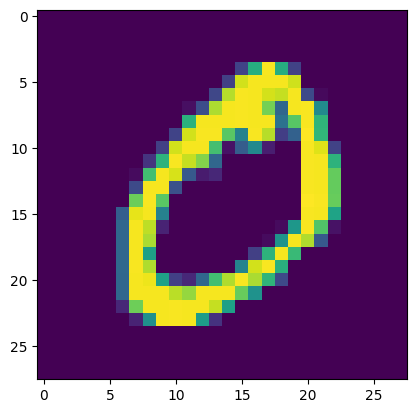

In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_input[1])
print(train_target[1])
plt.show()

In [3]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

/home/lws/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-18 09:43:39.206913: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 824,458 (3.15 MB)

 Trainable params: 824,458 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
val_scaled = val_input.reshape(-1, 28, 28, 1) / 255.0
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
     

Epoch 1/20


2025-06-18 09:43:56.405432: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9039 - loss: 0.3039

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9039 - loss: 0.3037 - val_accuracy: 0.9870 - val_loss: 0.0369
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9838 - loss: 0.0537

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9838 - loss: 0.0537 - val_accuracy: 0.9895 - val_loss: 0.0321
Epoch 3/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9888 - loss: 0.0376

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.9888 - loss: 0.0376 - val_accuracy: 0.9873 - val_loss: 0.0410
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9913 - loss: 0.0290

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9910 - val_loss: 0.0257
Epoch 5/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9925 - loss: 0.0234

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9904 - val_loss: 0.0291
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9938 - loss: 0.0196

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9927 - val_loss: 0.0229
Epoch 7/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9953 - loss: 0.0145

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9953 - loss: 0.0145 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 8/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9960 - loss: 0.0117

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9905 - val_loss: 0.0340
